In [1]:
import pandas as pd

# Read data from text file into a list
file_path = 'rhb-nov.txt'  # Replace with the actual path to your text file
with open(file_path, 'r') as file:
    data_list = file.read().splitlines()

# Create DataFrame from the list
df = pd.DataFrame(data_list, columns=['Data'])

# Group by integer division of index by 5, select the 'Data' column, and transpose
df = df.groupby(df.index // 4).apply(lambda x: x.reset_index(drop=True).squeeze())

In [3]:
# Remove the 2nd column
df = df.drop(df.columns[1], axis=1)

# Rename columns
df.columns = ['Item', 'Amount', 'Date']

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

# Filter the DataFrame to include only dates in November
df = df[(df['Date'].dt.month == 11)]

In [5]:
df['Amount'] = pd.to_numeric(df['Amount'].str.replace(r'MYR|,|\s', '', regex=True))

In [6]:
df = df[(df['Amount'] < 0)]
df['Amount'] = df['Amount'].abs()

In [15]:
# Define categories based on keywords
category_mapping = {
    'Grocery': ['FRUITS', 'SPEEDMART', 'FRUTOPIA', 'ECONSAVE', 'VILLAGE GROCER', 'STAR GROCER', 'JAYA GROCER', 'KIFARAH', 'LOTUS'],
    'Coffee': ['COFFEA COFFEE', 'RICHIAMO', 'ZUSCOFFEE'],
    'Pharmacy/Hospital': ['HEALTH LANE', 'ANDORRA', 'WATSON'],
    'Education': ['GOOGLE POCKET PREP', 'BOOKXCESS', 'MPH'],
    'Shopping': ['SHOPEE MALAYSIA', 'PADINI', 'IOIMALL', 'MR DIY'],
    'EatOut': ['RESTORAN', 'RAMEN', 'MOLLY-NL', 'TCRS', 'BAKERY', 'NOODLE'],
    'Fuel': ['SHELL'],
    'Payment': ['PAYMENT VIA DUITNOW', 'TNG EWALLET', 'CASHBACK'],
    'Cloud': ['GOOGLE STORAGE'],
    'Work': ['PYRAMID', 'SWY', 'SUNWAY'],
    'Entertainment': ['WETLAND STUDIOS'],
    'ConvenienceStore': ['MYNEWS', '7-ELEVEN', 'FAMILYMART', 'KK SUPER MART'],
    'Services': ['TNB', 'YOODO', 'CUCKOO', 'TNG'], 
    'AdHoc/Emergency': ['TAYAR']
}

# Categorize items based on keywords
for category, keywords in category_mapping.items():
    df.loc[df['Item'].str.contains('|'.join(keywords), case=False), 'Category'] = category

# Fill NaN values in the "Category" column with a default category or leave them as NaN
df['Category'] = df['Category'].fillna('Other')

In [16]:
df

,Item,Amount,Date,Category
109,SPEEDMART-2356 S...,11.75,2023-11-30,Grocery
110,COFFEA COFFEE-CYBRJY ...,28.60,2023-11-29,Coffee
111,SPEEDMART-2356 S...,64.35,2023-11-29,Grocery
112,MY TNB-EC ...,164.50,2023-11-29,Services
113,SHELL-CJ ROUTE ...,52.15,2023-11-28,Fuel
...,...,...,...,...
193,ICHIBAN RAMEN-IOI CITY ...,55.60,2023-11-02,EatOut
194,TNG-EWALLET ECOM 2-EC ...,50.00,2023-11-02,Services
195,CUCKOO ...,56.60,2023-11-01,Services
196,MYNEWS.COM-SHAFTBURY SQ#6...,3.90,2023-11-01,ConvenienceStore


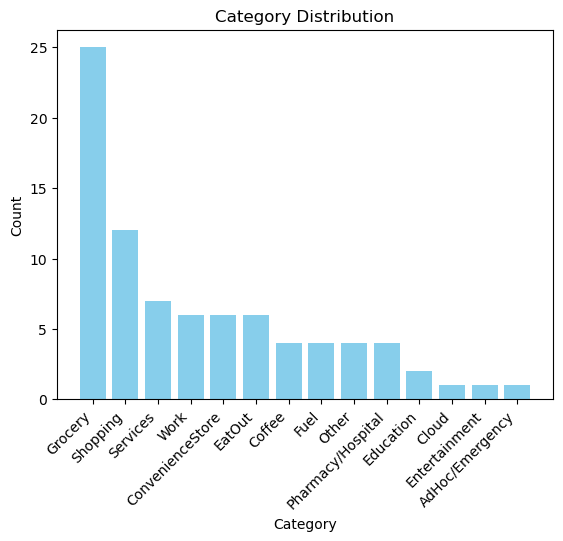

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plotting the bar chart
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

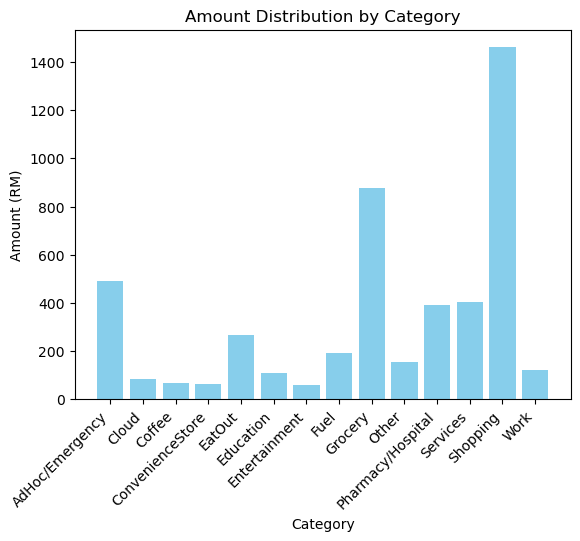

In [18]:
# Group by category and sum the amounts
category_sums = df.groupby('Category')['Amount'].sum()

# Plotting the bar chart
plt.bar(category_sums.index, category_sums.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Amount (RM)')
plt.title('Amount Distribution by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
df[df['Category'] == 'Grocery']

,Item,Amount,Date,Category
109,SPEEDMART-2356 S...,11.75,2023-11-30,Grocery
111,SPEEDMART-2356 S...,64.35,2023-11-29,Grocery
118,SPEEDMART-1519 S...,11.65,2023-11-26,Grocery
119,SPEEDMART-1519 S...,12.90,2023-11-26,Grocery
122,FRUTOPIA SP...,15.50,2023-11-26,Grocery
123,ECONSAVE EX GLOMAC CYB ...,100.30,2023-11-25,Grocery
124,SPEEDMART-2356 S...,34.30,2023-11-25,Grocery
126,VILLAGE GROCER-TAMARIN SP...,24.90,2023-11-24,Grocery
127,VILLAGE GROCER-TAMARIN SP...,73.75,2023-11-24,Grocery
128,SINAR KIFARAH ENTERPRISE ...,1.00,2023-11-24,Grocery


In [24]:
df.to_csv("202311-RHB-FINAL.csv", index=False)